# Music Generation RNN
This jupyter notebook covers the whole data pipeline and goes through multiple experiments to reflect on our achievements and learnings during the development process.

## Setup
This section installs and imports the required libraries.

In [1]:
!wget "https://tinyurl.com/mpkou9t"
!pip install pretty-midi
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth

--2021-12-20 04:45:49--  https://tinyurl.com/mpkou9t
Resolving tinyurl.com (tinyurl.com)... 104.20.139.65, 172.67.1.225, 104.20.138.65, ...
Connecting to tinyurl.com (tinyurl.com)|104.20.139.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://free-piano-tutorials-midi.s3.amazonaws.com/Alan%20Walker%20-%20Faded/Alan_Walker_Faded.mid [following]
--2021-12-20 04:45:49--  https://free-piano-tutorials-midi.s3.amazonaws.com/Alan%20Walker%20-%20Faded/Alan_Walker_Faded.mid
Resolving free-piano-tutorials-midi.s3.amazonaws.com (free-piano-tutorials-midi.s3.amazonaws.com)... 52.217.8.228
Connecting to free-piano-tutorials-midi.s3.amazonaws.com (free-piano-tutorials-midi.s3.amazonaws.com)|52.217.8.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10460 (10K) [audio/mid]
Saving to: ‘mpkou9t.3’

mpkou9t.3           100%[===================>]  10.21K  --.-KB/s    in 0s      

2021-12-20 04:45:50 (119 MB/s) - ‘mpkou9t.3’ sav

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import src.models.basic_rnn as brnn
from src.utils.visualization import plot_piano_roll, plot_histories

## Experiments
Our data pre-processing is handled by the different experiment classes as some of them require differ inputs which we have continuosly improved during our research and development. 

### Experiment 1 - Tensorflow Tutorial
The modle provided by the Tensorflow tutorial is very different from the other models and the model in the paper by Daniel Johnson because it does not use the a beat-wise structure. Instead it utilizes the time stamps of each note. While this simplifies the data processing, the generated music is not very complex. Link to model: https://www.tensorflow.org/tutorials/audio/music_generation

- Input: The data is in a dictonary of the form \["pitch", "step", "duration"\]
- Model: 1 LSTM layer (128) and one Dense layer without activation. 
    - Optimizer: Adam
    - Loss: SparseCategoricalLoss
- Output: Predicts pitch, step, and duration at the same time

Experiment 1:
in get_model self is <src.models.basic_rnn.RNNMusicExperimentSix object at 0x7fb44be26860>
Epoch 1/10
519/519 [==============================] - 9s 5ms/step - loss: 0.3106 - duration_loss: 0.0569 - pitch_loss: 4.2398 - step_loss: 0.0417
Epoch 2/10
519/519 [==============================] - 2s 4ms/step - loss: 0.2723 - duration_loss: 0.0483 - pitch_loss: 3.9484 - step_loss: 0.0266
Epoch 3/10
519/519 [==============================] - 2s 4ms/step - loss: 0.2679 - duration_loss: 0.0482 - pitch_loss: 3.8676 - step_loss: 0.0263
Epoch 4/10
519/519 [==============================] - 2s 4ms/step - loss: 0.2640 - duration_loss: 0.0467 - pitch_loss: 3.8291 - step_loss: 0.0258
Epoch 5/10
519/519 [==============================] - 2s 4ms/step - loss: 0.2619 - duration_loss: 0.0458 - pitch_loss: 3.8190 - step_loss: 0.0252
Epoch 6/10
519/519 [==============================] - 2s 4ms/step - loss: 0.2596 - duration_loss: 0.0449 - pitch_loss: 3.8043 - step_loss: 0.0246
Epoch 7/10
519/519 

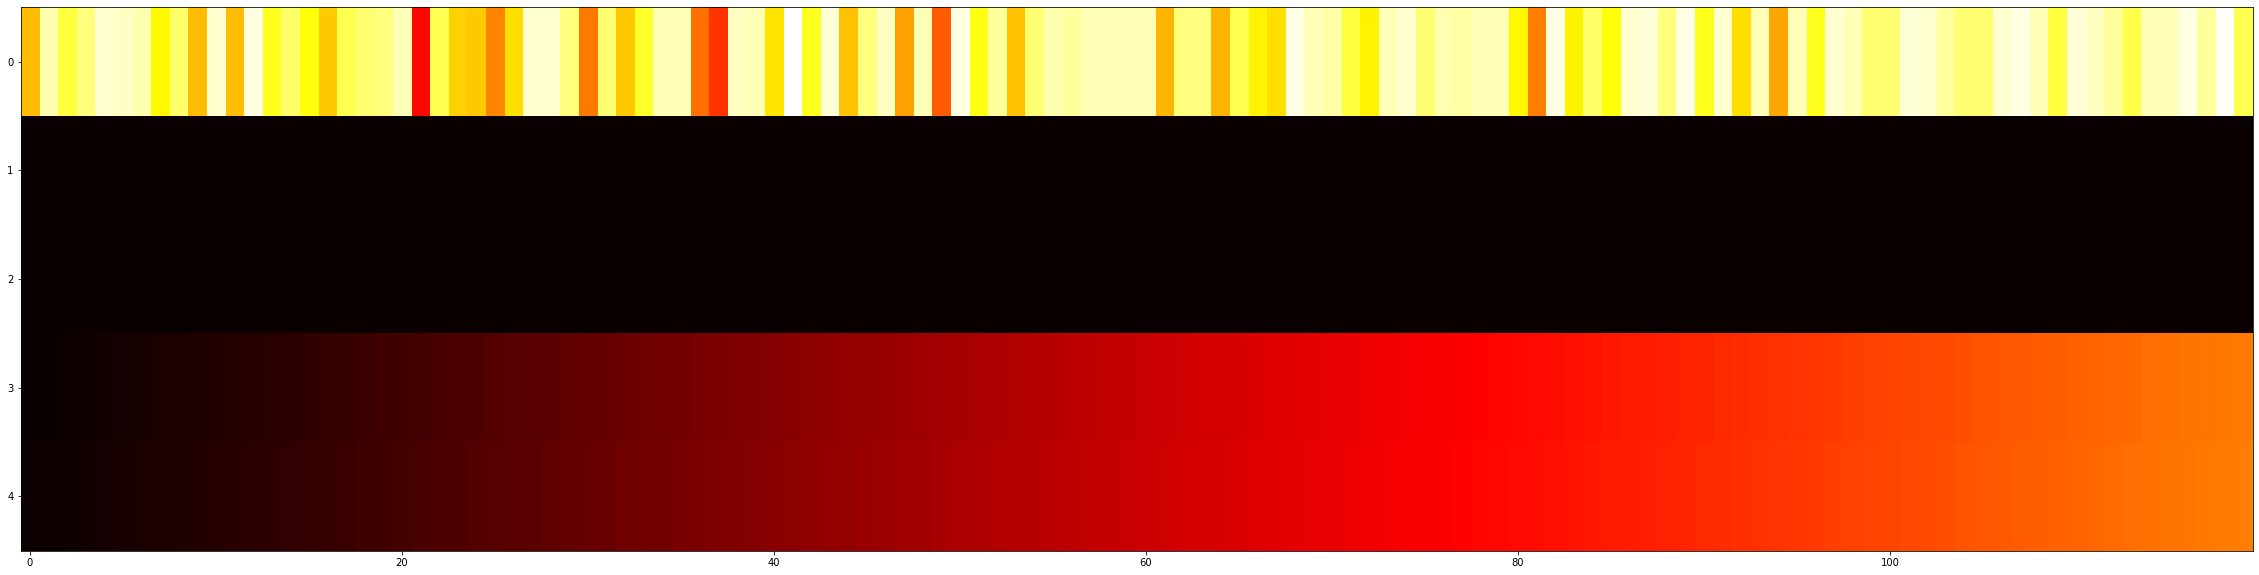

In [2]:
print("Experiment 1:")
exp = brnn.RNNMusicExperimentSix(
    learning_rate=0.005,
    epochs=10,
    batch_size=64,
    num_music_files=5,
    sequence_length=25,
)
exp.run()

In [ ]:
#TODO: Fix graph
#TODO: Display Audio

#### Analysis:
# TODO: ADD TEXT

### Experiment 2 - [NAME]
#TODO: Explanation

- Input: The data is in shape (260 x seq_length) - 260 being 128 notes + 128 articulations + 4 beats
- Model: 4 LSTM layers (256) and one Dense layer without relu activation. 
    - Optimizer: Adam
    - Loss: CategoricalCrossEntropy
- Output: Predicts the next timesteps, i.e. which notes are played at the next beat.

In [3]:
print("Experiment 2:")
exp = brnn.RNNMusicExperimentOne(
    learning_rate=0.005,
    epochs=10,
    batch_size=64,
    num_music_files=5,
    sequence_length=25,
)
exp.run()

Experiment 2:


AttributeError: 'RNNMusicDataSetPreparer' object has no attribute 'all_midi_obj_to_play_articulate'

## Evaluation of Different Models

In [ ]:
histories = []
history_labels = []
parameter = "loss"
histories.append(exp1_history)
history_labels.append("exp1")

exp1_history = exp.get_history()

In [ ]:
plot_histories(histories, history_labels, parameter)

In [ ]:
#TODO: Plot graph with all models
#TODO: Have predicted music files from each (optional)
#TODO: Write paragraph about what effect each change has